# **PASA ALTAS (ENVENTANADO)**

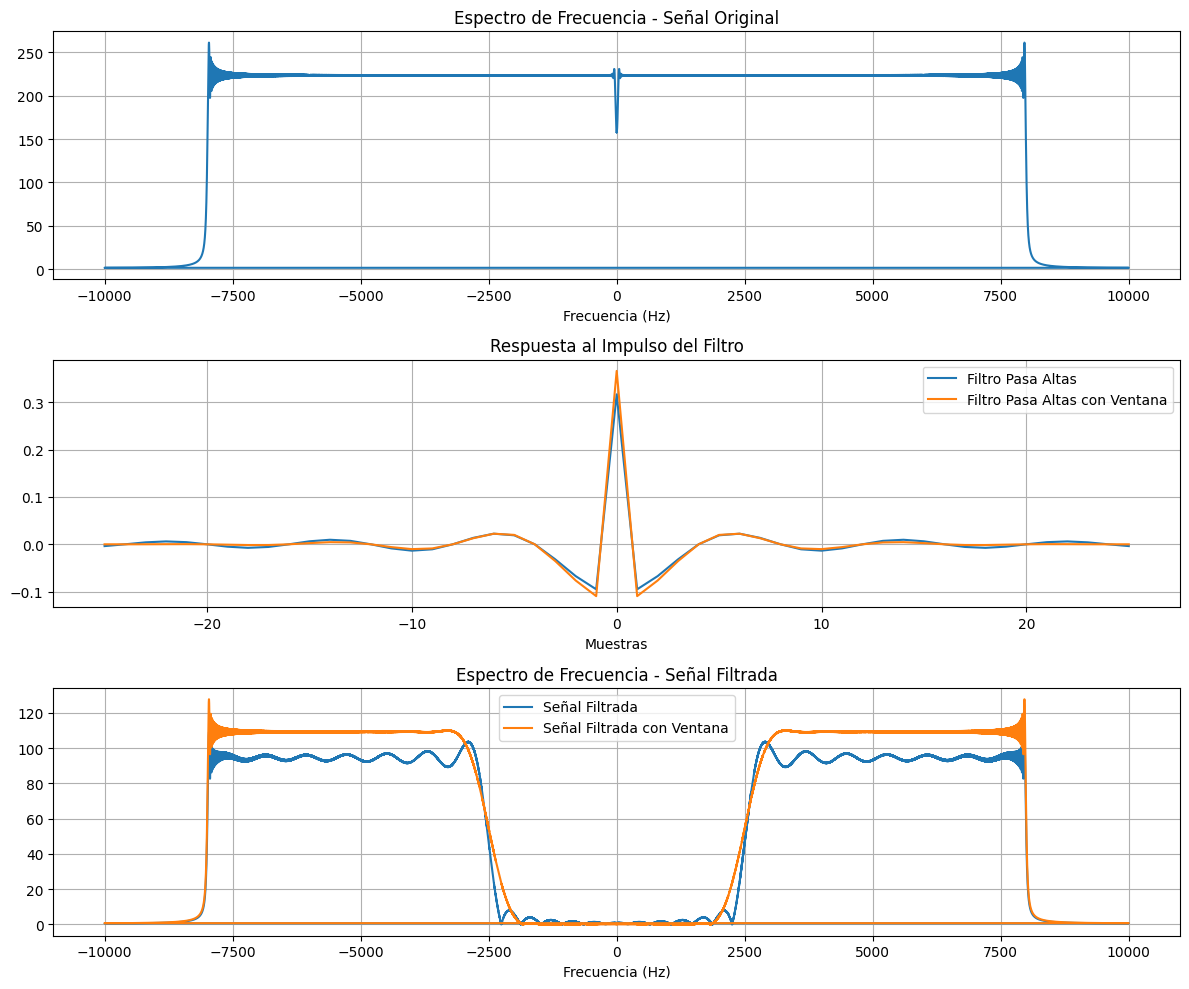

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Función para generar el filtro pasa altas
def high_pass_filter(signal, coefficients):
    filtered_signal = np.convolve(signal, coefficients, mode='same')
    return filtered_signal

#Funciones de la ventanas
def rectangular_window(N):
    return np.ones(N)

def hanning_window(N):
    n = np.arange(0, N)
    return 0.5 * (1 - np.cos(2 * np.pi * n / (N - 1)))

def hamming_window(N):
    n = np.arange(0, N)
    return 0.54 - 0.46 * np.cos(2 * np.pi * n / (N - 1))

def blackman_window(N):
    n = np.arange(0, N)
    return 0.42 - 0.5 * np.cos(2 * np.pi * n / (N - 1)) + 0.8 * np.cos(4 * np.pi * n / (N - 1))


# Parámetros de la señal
fs = 20000  # Frecuencia de muestreo en Hz
f_signal = 500  # Nueva frecuencia de la señal en Hz (cambiada a 500 Hz)
t = np.arange(0, 4, 1/fs)  # Vector de tiempo de 4 segundos

# Generar señal senoidal con la nueva frecuencia
signal = np.sin(2 * np.pi * f_signal * ((2*t*t)-2))

# Parámetros del filtro pasa altas
f_cutoff = 2500  # Frecuencia de corte del filtro en Hz
wc = 2 * np.pi * f_cutoff / fs  # Frecuencia angular de corte

# Coeficientes del filtro pasa altas
N = 51  # Longitud del filtro (debe ser impar)
n_vector = np.arange(-(N-1)//2, (N+1)//2)
coefficients = []

for n_val in n_vector:
    if n_val == 0:
        h_n = 1 - 2 * f_cutoff / fs
    else:
        h_n = -((2 * f_cutoff / fs) * math.sin(n_val * wc) / (n_val * wc))

    coefficients.append(h_n)

# Normalizar los coeficientes para mantener la amplitud de la señal
coefficients /= np.sum(np.abs(coefficients))

# Aplicar el filtro pasa altas
filtered_signal = high_pass_filter(signal, coefficients)
# Aplicar una ventana al filtro
window = hanning_window(N)  # Puedes elegir otro tipo de ventana según tus necesidades
coefficients_windowed = coefficients * window

# Normalizar los coeficientes para mantener la amplitud de la señal
coefficients_windowed /= np.sum(np.abs(coefficients_windowed))

# Aplicar el filtro pasa altas con ventana
filtered_signal_windowed = high_pass_filter(signal, coefficients_windowed)

# Calcular la transformada de Fourier de la señal original y filtrada
freq = np.fft.fftfreq(len(t), 1/fs)
fft_signal = np.fft.fft(signal)
fft_filtered_signal = np.fft.fft(filtered_signal)
fft_filtered_signal_windowed = np.fft.fft(filtered_signal_windowed)

# Graficar resultados en el dominio de la frecuencia
plt.figure(figsize=(12, 10))

plt.subplot(3, 1, 1)
plt.plot(freq, np.abs(fft_signal))
plt.title('Espectro de Frecuencia - Señal Original')
plt.xlabel('Frecuencia (Hz)')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(n_vector, coefficients, label='Filtro Pasa Altas')
plt.plot(n_vector, coefficients_windowed, label='Filtro Pasa Altas con Ventana')
plt.title('Respuesta al Impulso del Filtro')
plt.xlabel('Muestras')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(freq, np.abs(fft_filtered_signal), label='Señal Filtrada')
plt.plot(freq, np.abs(fft_filtered_signal_windowed), label='Señal Filtrada con Ventana')
plt.title('Espectro de Frecuencia - Señal Filtrada')
plt.xlabel('Frecuencia (Hz)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# **PASA BAJAS**

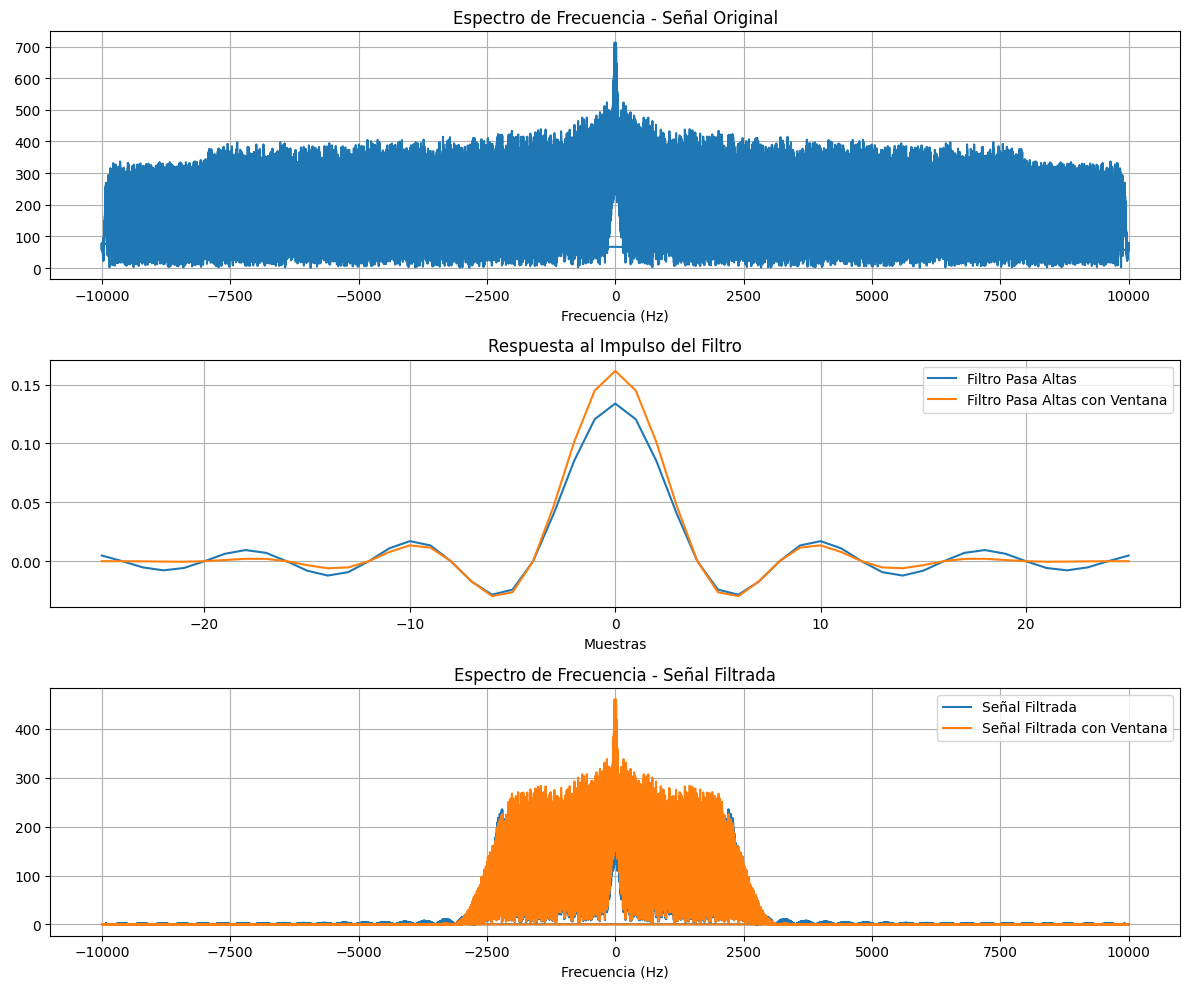

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Función para generar el filtro pasa altas
def high_pass_filter(signal, coefficients):
    filtered_signal = np.convolve(signal, coefficients, mode='same')
    return filtered_signal

#Funciones de la ventanas
def rectangular_window(N):
    return np.ones(N)

def hanning_window(N):
    n = np.arange(0, N)
    return 0.5 * (1 - np.cos(2 * np.pi * n / (N - 1)))

def hamming_window(N):
    n = np.arange(0, N)
    return 0.54 - 0.46 * np.cos(2 * np.pi * n / (N - 1))

def blackman_window(N):
    n = np.arange(0, N)
    return 0.42 - 0.5 * np.cos(2 * np.pi * n / (N - 1)) + 0.8 * np.cos(4 * np.pi * n / (N - 1))


# Parámetros de la señal
fs = 20000  # Frecuencia de muestreo en Hz
f_signal = 500  # Nueva frecuencia de la señal en Hz (cambiada a 500 Hz)
t = np.arange(0, 4, 1/fs)  # Vector de tiempo de 4 segundos

# Generar señal senoidal con la nueva frecuencia
signal = np.sin(2 * np.pi * f_signal * ((2*t*t*t)-2))

# Parámetros del filtro pasa altas
f_cutoff = 2500  # Frecuencia de corte del filtro en Hz
wc = 2 * np.pi * f_cutoff / fs  # Frecuencia angular de corte

# Coeficientes del filtro pasa altas
N = 51  # Longitud del filtro (debe ser impar)
n_vector = np.arange(-(N-1)//2, (N+1)//2)
coefficients = []

for n_val in n_vector:
    if n_val == 0:
        h_n =  2 * f_cutoff / fs
    else:
        h_n = ((2 * f_cutoff / fs) * math.sin(n_val * wc) / (n_val * wc))

    coefficients.append(h_n)

# Normalizar los coeficientes para mantener la amplitud de la señal
coefficients /= np.sum(np.abs(coefficients))

# Aplicar el filtro pasa altas
filtered_signal = high_pass_filter(signal, coefficients)
# Aplicar una ventana al filtro
window = hanning_window(N)  # Puedes elegir otro tipo de ventana según tus necesidades
coefficients_windowed = coefficients * window

# Normalizar los coeficientes para mantener la amplitud de la señal
coefficients_windowed /= np.sum(np.abs(coefficients_windowed))

# Aplicar el filtro pasa altas con ventana
filtered_signal_windowed = high_pass_filter(signal, coefficients_windowed)

# Calcular la transformada de Fourier de la señal original y filtrada
freq = np.fft.fftfreq(len(t), 1/fs)
fft_signal = np.fft.fft(signal)
fft_filtered_signal = np.fft.fft(filtered_signal)
fft_filtered_signal_windowed = np.fft.fft(filtered_signal_windowed)

# Graficar resultados en el dominio de la frecuencia
plt.figure(figsize=(12, 10))

plt.subplot(3, 1, 1)
plt.plot(freq, np.abs(fft_signal))
plt.title('Espectro de Frecuencia - Señal Original')
plt.xlabel('Frecuencia (Hz)')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(n_vector, coefficients, label='Filtro Pasa Altas')
plt.plot(n_vector, coefficients_windowed, label='Filtro Pasa Altas con Ventana')
plt.title('Respuesta al Impulso del Filtro')
plt.xlabel('Muestras')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(freq, np.abs(fft_filtered_signal), label='Señal Filtrada')
plt.plot(freq, np.abs(fft_filtered_signal_windowed), label='Señal Filtrada con Ventana')
plt.title('Espectro de Frecuencia - Señal Filtrada')
plt.xlabel('Frecuencia (Hz)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# **PASA BANDA**

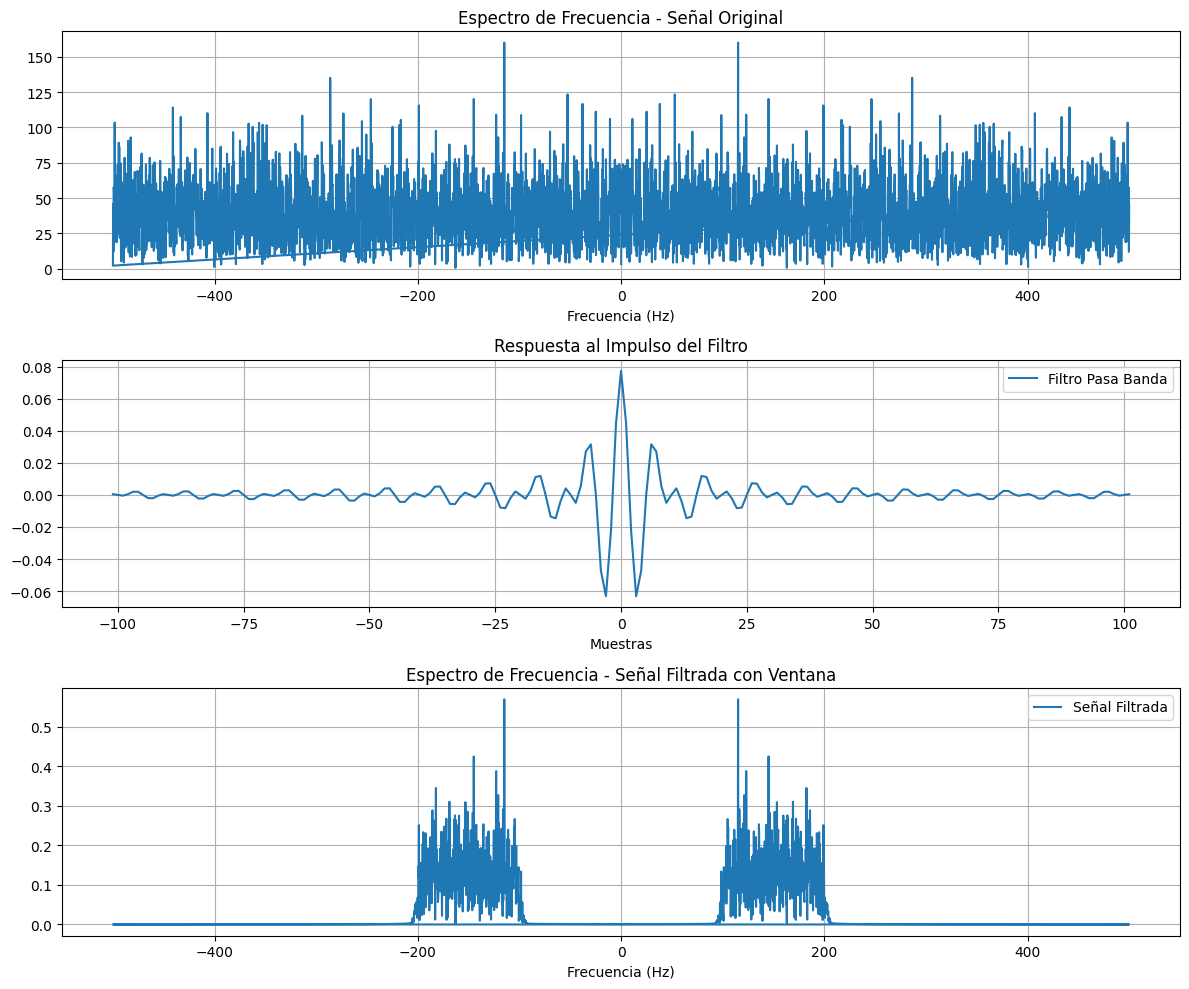

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Función para generar el filtro pasa banda
def pasa_banda(fc1, fc2, fs, N):
    wc1 = 2 * math.pi * (fc1 / fs)
    wc2 = 2 * math.pi * (fc2 / fs)

    coeficientes = []

    for n_val in range(-N, N+1):
        if n_val == 0:
            h_n = 2 * (fc2/fs - fc1/fs)
        else:
            h_n = 2 * (fc2/fs) * (math.sin(wc2 * n_val) / (wc2 * n_val)) - 2 * (fc1/fs) * (math.sin(wc1 * n_val) / (wc1 * n_val))

        coeficientes.append(h_n)

    return coeficientes


# Función para aplicar un filtro a una señal
def apply_filter(signal, coefficients):
    filtered_signal = np.convolve(signal, coefficients, mode='same')
    return filtered_signal

# Funciones de la ventana
def hanning_window(N):
    n = np.arange(0, N)
    return 0.5 * (1 - np.cos(2 * np.pi * n / (N)))
def hanning_window(N):
    n = np.arange(0, N)
    return 0.5 * (1 - np.cos(2 * np.pi * n / (N - 1)))

def hamming_window(N):
    n = np.arange(0, N)
    return 0.54 - 0.46 * np.cos(2 * np.pi * n / (N - 1))

def blackman_window(N):
    n = np.arange(0, N)
    return 0.42 - 0.5 * np.cos(2 * np.pi * n / (N - 1)) + 0.8 * np.cos(4 * np.pi * n / (N - 1))

# Parámetros de la señal
fs = 1000  # Frecuencia de muestreo en Hz
f_signal = 3000  # Nueva frecuencia de la señal en Hz (cambiada a 500 Hz)
t = np.arange(0, 4, 1/fs)  # Vector de tiempo de 4 segundos

# Generar señal senoidal con la nueva frecuencia
signal = np.sin(2 * np.pi * f_signal * ((2*t*t*t)-2))

# Parámetros del filtro pasa banda
fc1 = 100  # Frecuencia de corte inferior del filtro en Hz
fc2 = 200  # Frecuencia de corte superior del filtro en Hz
N = 101  # Longitud del filtro (debe ser impar)

# Coeficientes del filtro pasa banda
coefficients = pasa_banda(fc1, fc2, fs, N)

# Normalizar los coeficientes para mantener la amplitud de la señal
coefficients /= np.sum(np.abs(coefficients))

# Ajustar la longitud de la ventana de Hanning
window = hamming_window(len(coefficients))
# Normalizar la ventana
window /= np.sum(window)

# Aplicar el filtro pasa banda con ventana
coefficients_windowed = coefficients * window
filtered_signal = apply_filter(signal, coefficients_windowed)

# Calcular la transformada de Fourier de la señal original y filtrada
freq = np.fft.fftfreq(len(t), 1/fs)
fft_signal = np.fft.fft(signal)
fft_filtered_signal = np.fft.fft(filtered_signal)

# Graficar resultados en el dominio de la frecuencia
plt.figure(figsize=(12, 10))

plt.subplot(3, 1, 1)
plt.plot(freq, np.abs(fft_signal))
plt.title('Espectro de Frecuencia - Señal Original')
plt.xlabel('Frecuencia (Hz)')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(np.arange(-N, N+1), coefficients, label='Filtro Pasa Banda')
plt.title('Respuesta al Impulso del Filtro')
plt.xlabel('Muestras')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(freq, np.abs(fft_filtered_signal), label='Señal Filtrada')
plt.title('Espectro de Frecuencia - Señal Filtrada con Ventana')
plt.xlabel('Frecuencia (Hz)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()



# **Rechaza Banda**

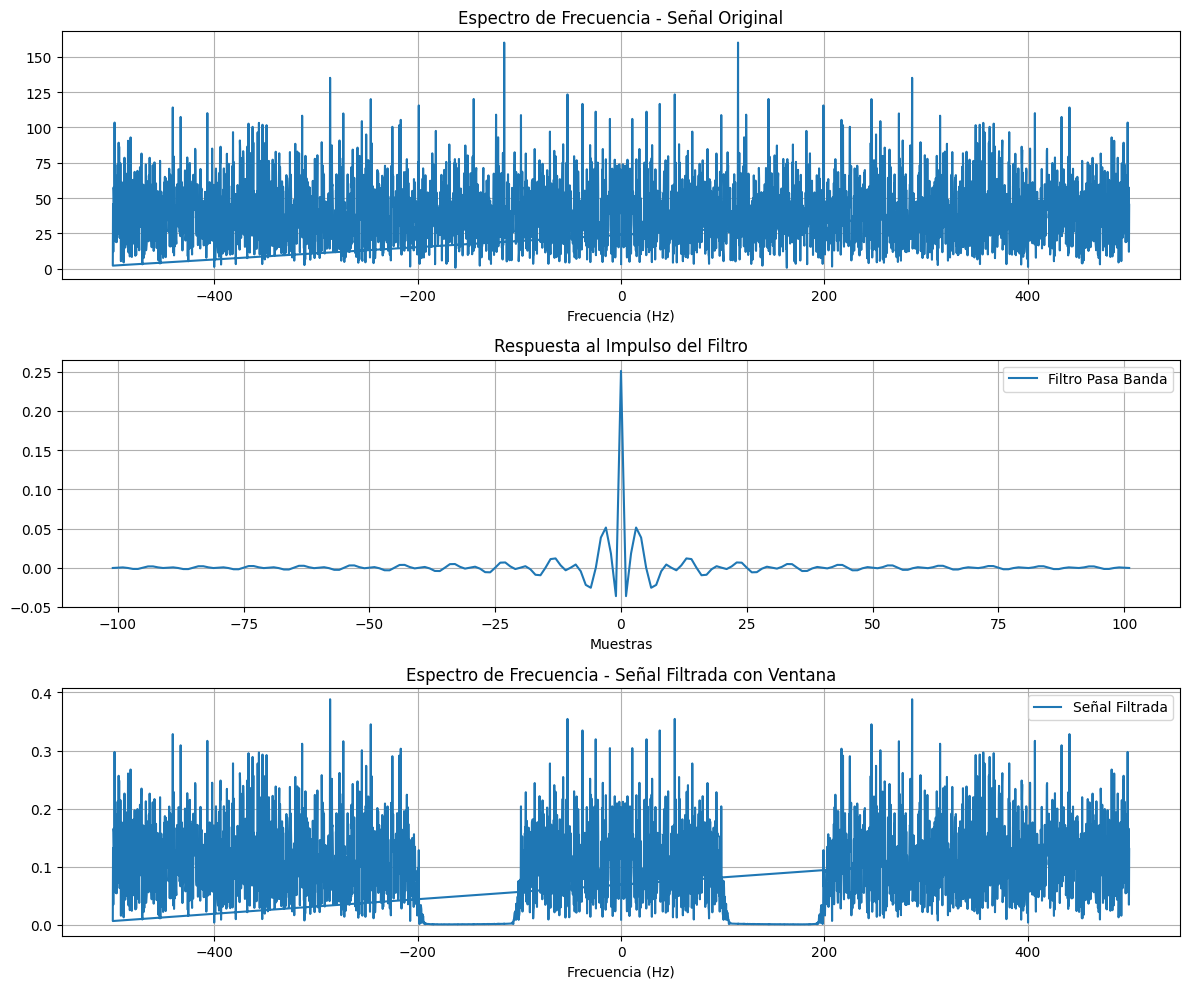

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Función para generar el filtro pasa banda
def rechaza_banda(fc1, fc2, fs, N):
    wc1 = 2 * math.pi * (fc1 / fs)
    wc2 = 2 * math.pi * (fc2 / fs)

    coeficientes = []

    for n_val in range(-N, N+1):
        if n_val == 0:
            h_n = 1 - 2 * (fc2/fs - fc1/fs)
        else:
            h_n = 2 * (fc1/fs) * (math.sin(wc1 * n_val) / (wc1 * n_val)) - 2 * (fc2/fs) * (math.sin(wc2 * n_val) / (wc2 * n_val))

        coeficientes.append(h_n)

    return coeficientes


# Función para aplicar un filtro a una señal
def apply_filter(signal, coefficients):
    filtered_signal = np.convolve(signal, coefficients, mode='same')
    return filtered_signal

# Funciones de la ventana
def hanning_window(N):
    n = np.arange(0, N)
    return 0.5 * (1 - np.cos(2 * np.pi * n / (N)))
def hanning_window(N):
    n = np.arange(0, N)
    return 0.5 * (1 - np.cos(2 * np.pi * n / (N - 1)))

def hamming_window(N):
    n = np.arange(0, N)
    return 0.54 - 0.46 * np.cos(2 * np.pi * n / (N - 1))

def blackman_window(N):
    n = np.arange(0, N)
    return 0.42 - 0.5 * np.cos(2 * np.pi * n / (N - 1)) + 0.8 * np.cos(4 * np.pi * n / (N - 1))

# Parámetros de la señal
fs = 1000  # Frecuencia de muestreo en Hz
f_signal = 3000  # Nueva frecuencia de la señal en Hz (cambiada a 500 Hz)
t = np.arange(0, 4, 1/fs)  # Vector de tiempo de 4 segundos

# Generar señal senoidal con la nueva frecuencia
signal = np.sin(2 * np.pi * f_signal * ((2*t*t*t)-2))

# Parámetros del filtro pasa banda
fc1 = 100  # Frecuencia de corte inferior del filtro en Hz
fc2 = 200  # Frecuencia de corte superior del filtro en Hz
N = 101  # Longitud del filtro (debe ser impar)

# Coeficientes del filtro pasa banda
coefficients = rechaza_banda(fc1, fc2, fs, N)

# Normalizar los coeficientes para mantener la amplitud de la señal
coefficients /= np.sum(np.abs(coefficients))

# Ajustar la longitud de la ventana de Hanning
window = hamming_window(len(coefficients))
# Normalizar la ventana
window /= np.sum(window)

# Aplicar el filtro pasa banda con ventana
coefficients_windowed = coefficients * window
filtered_signal = apply_filter(signal, coefficients_windowed)

# Calcular la transformada de Fourier de la señal original y filtrada
freq = np.fft.fftfreq(len(t), 1/fs)
fft_signal = np.fft.fft(signal)
fft_filtered_signal = np.fft.fft(filtered_signal)

# Graficar resultados en el dominio de la frecuencia
plt.figure(figsize=(12, 10))

plt.subplot(3, 1, 1)
plt.plot(freq, np.abs(fft_signal))
plt.title('Espectro de Frecuencia - Señal Original')
plt.xlabel('Frecuencia (Hz)')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(np.arange(-N, N+1), coefficients, label='Filtro Pasa Banda')
plt.title('Respuesta al Impulso del Filtro')
plt.xlabel('Muestras')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(freq, np.abs(fft_filtered_signal), label='Señal Filtrada')
plt.title('Espectro de Frecuencia - Señal Filtrada con Ventana')
plt.xlabel('Frecuencia (Hz)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


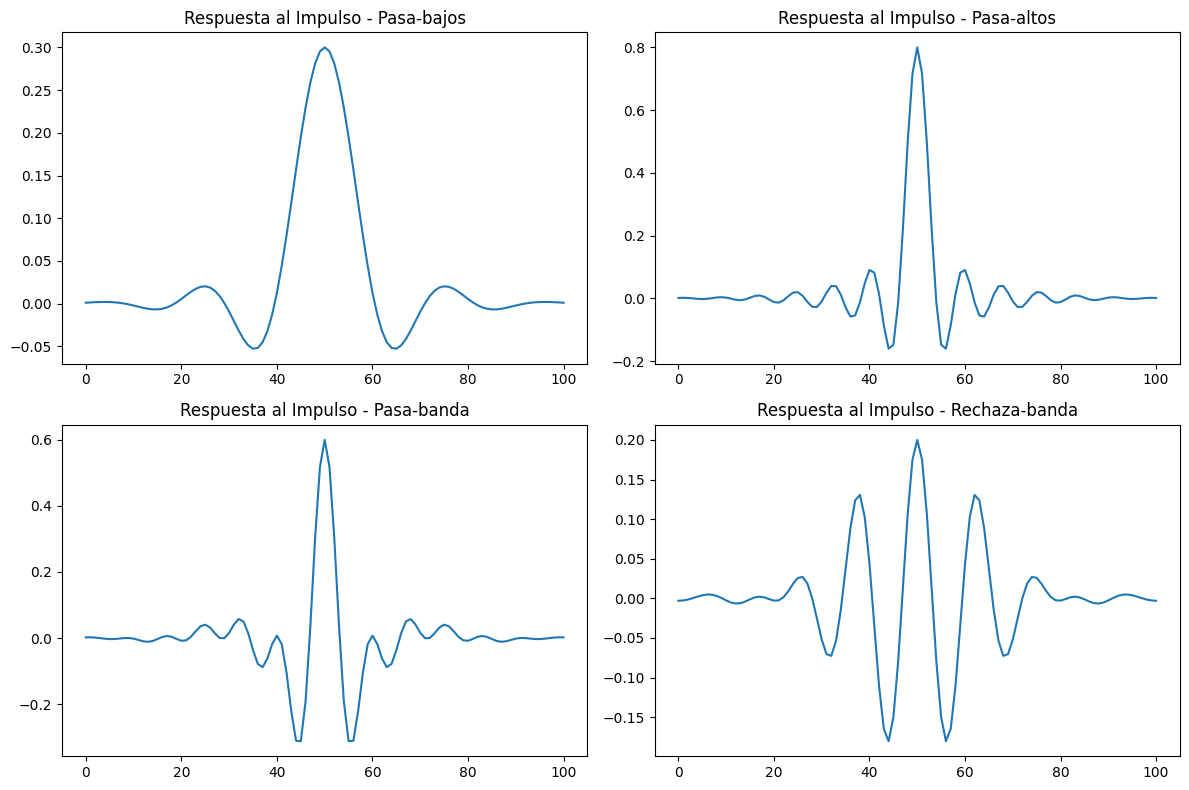

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sinc(x):
    # Función sinc
    return np.sinc(x / np.pi)

def generate_window(type, M):
    # Implementación de funciones de ventana
    if type == 'rectangular':
        return np.ones(M)
    elif type == 'hamming':
        return 0.54 - 0.46 * np.cos(2 * np.pi * np.arange(M) / (M - 1))
    elif type == 'blackman':
        return 0.42 - 0.5 * np.cos(2 * np.pi * np.arange(M) / (M - 1)) + 0.08 * np.cos(4 * np.pi * np.arange(M) / (M - 1))
    else:
        raise ValueError("Tipo de ventana no soportada")

def windowed_sinc_filter(frequency, cutoff_frequency, window_type, num_taps):
    fs = 2 * frequency  # Frecuencia de muestreo

    # Diseñamos la ventana
    window = generate_window(window_type, num_taps)

    # Diseñamos el filtro mediante el método de enventanado y muestreo en frecuencia
    n = np.arange(num_taps)
    h = 2 * cutoff_frequency / fs * sinc(2 * cutoff_frequency / fs * (n - (num_taps - 1) / 2)) * window

    return h

# Parámetros del filtro
frequency = 1000  # Frecuencia de muestreo en Hz
cutoff_frequency_lowpass = 300  # Frecuencia de corte del filtro pasa-bajos
cutoff_frequency_highpass = 800  # Frecuencia de corte del filtro pasa-altos
cutoff_frequency_bandpass_low = 200  # Frecuencia de corte inferior del filtro pasa-banda
cutoff_frequency_bandpass_high = 800  # Frecuencia de corte superior del filtro pasa-banda
cutoff_frequency_bandstop_low = 400  # Frecuencia de corte inferior del filtro rechaza-banda
cutoff_frequency_bandstop_high = 600  # Frecuencia de corte superior del filtro rechaza-banda
num_taps = 101  # Número de coeficientes del filtro
window_type = 'hamming'  # Tipo de ventana

# Diseñamos los filtros
h_lowpass = windowed_sinc_filter(frequency, cutoff_frequency_lowpass, window_type, num_taps)
h_highpass = windowed_sinc_filter(frequency, cutoff_frequency_highpass, window_type, num_taps)
h_bandpass = windowed_sinc_filter(frequency, cutoff_frequency_bandpass_high, window_type, num_taps) \
              - windowed_sinc_filter(frequency, cutoff_frequency_bandpass_low, window_type, num_taps)
h_bandstop = windowed_sinc_filter(frequency, cutoff_frequency_bandstop_high, window_type, num_taps) \
              - windowed_sinc_filter(frequency, cutoff_frequency_bandstop_low, window_type, num_taps)

# Visualizamos las respuestas al impulso de los filtros
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.plot(h_lowpass)
plt.title('Respuesta al Impulso - Pasa-bajos')

plt.subplot(222)
plt.plot(h_highpass)
plt.title('Respuesta al Impulso - Pasa-altos')

plt.subplot(223)
plt.plot(h_bandpass)
plt.title('Respuesta al Impulso - Pasa-banda')

plt.subplot(224)
plt.plot(h_bandstop)
plt.title('Respuesta al Impulso - Rechaza-banda')

plt.tight_layout()
plt.show()



ANALÓGICOS A IIR

Por aproximación en derivadas

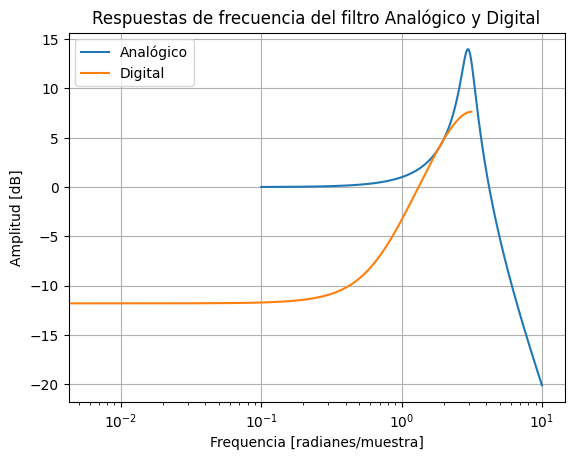

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Parámetros del filtro analógico
omega_n = 3.0  # Frecuencia natural no amortiguada
zeta = 0.1  # Factor de amortiguamiento

# Función de transferencia del filtro analógico
numerator_analog = [1]
denominator_analog = [1/(omega_n**2), 2*zeta/omega_n, 1]

# Convertir a función de transferencia discreta utilizando el método de aproximación en derivada
T = 2  # Período de muestreo
system = signal.cont2discrete((numerator_analog, denominator_analog), T, method='foh')

# Coeficientes del filtro IIR discreto
b = system[0][0]
a = system[1][0]

# Visualizar la respuesta de frecuencia del filtro analógico
w_analog, h_analog = signal.freqs(numerator_analog, denominator_analog)
plt.semilogx(w_analog, 20 * np.log10(abs(h_analog)), label='Analógico')

# Visualizar la respuesta de frecuencia del filtro IIR discreto
w_digital, h_digital = signal.freqz(b, a)
plt.semilogx(w_digital, 20 * np.log10(abs(h_digital)), label='Digital')

plt.title('Respuestas de frecuencia del filtro Analógico y Digital')
plt.xlabel('Frequencia [radianes/muestra]')
plt.ylabel('Amplitud [dB]')
plt.legend()
plt.grid(True)
plt.show()


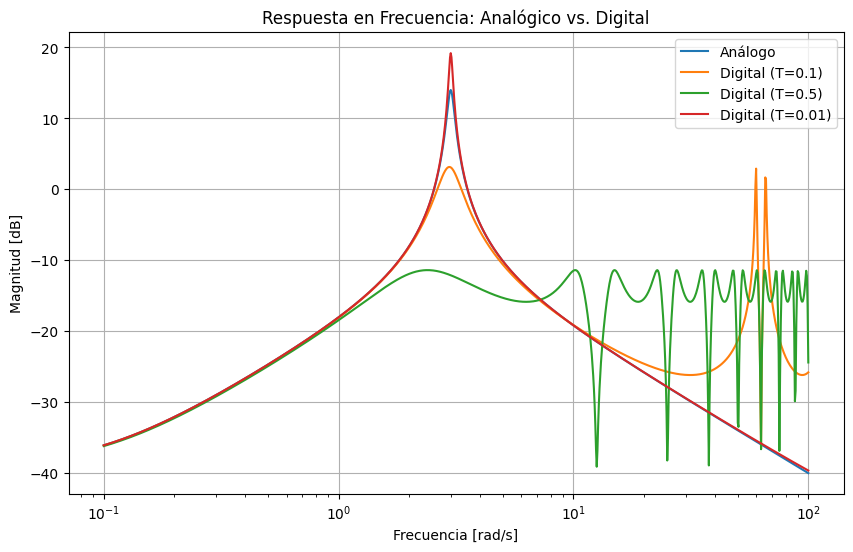

In [ ]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np

# Definir símbolos
s, z, T = sp.symbols('s z T')

# Función de transferencia analógica
Ha = (s + 0.1) / ((s + 0.1)**2 + 9)

# Método de invarianza impulsional
Hd_01 = Ha.subs(s, (z - 1) / 0.1).simplify()
Hd_05 = Ha.subs(s, (z - 1) / 0.5).simplify()
Hd_001 = Ha.subs(s, (z - 1) / 0.01).simplify()

# Convertir a coeficientes numéricos para graficar
num_Ha, den_Ha = sp.fraction(Ha)
num_Hd_01, den_Hd_01 = sp.fraction(Hd_01)
num_Hd_05, den_Hd_05 = sp.fraction(Hd_05)
num_Hd_001, den_Hd_001 = sp.fraction(Hd_001)

num_Ha_coef = [float(coeff) for coeff in sp.Poly(num_Ha, s).all_coeffs()]
den_Ha_coef = [float(coeff) for coeff in sp.Poly(den_Ha, s).all_coeffs()]
num_Hd_01_coef = [float(coeff) for coeff in sp.Poly(num_Hd_01, z).all_coeffs()]
den_Hd_01_coef = [float(coeff) for coeff in sp.Poly(den_Hd_01, z).all_coeffs()]
num_Hd_05_coef = [float(coeff) for coeff in sp.Poly(num_Hd_05, z).all_coeffs()]
den_Hd_05_coef = [float(coeff) for coeff in sp.Poly(den_Hd_05, z).all_coeffs()]
num_Hd_001_coef = [float(coeff) for coeff in sp.Poly(num_Hd_001, z).all_coeffs()]
den_Hd_001_coef = [float(coeff) for coeff in sp.Poly(den_Hd_001, z).all_coeffs()]

# Respuesta en frecuencia
w = np.logspace(-1, 2, 1000)
Ha_freq = sp.lambdify(s, Ha)
Hd_01_freq = sp.lambdify(z, Hd_01)
Hd_05_freq = sp.lambdify(z, Hd_05)
Hd_001_freq = sp.lambdify(z, Hd_001)

Ha_mag = np.abs(Ha_freq(1j * w))
Hd_01_mag = np.abs(Hd_01_freq(np.exp(1j * w * 0.1)))
Hd_05_mag = np.abs(Hd_05_freq(np.exp(1j * w * 0.5)))
Hd_001_mag = np.abs(Hd_001_freq(np.exp(1j * w * 0.01)))

# Graficar la magnitud de la respuesta en frecuencia
plt.figure(figsize=(10, 6))
plt.semilogx(w, 20 * np.log10(Ha_mag), label='Análogo')
plt.semilogx(w, 20 * np.log10(Hd_01_mag), label='Digital (T=0.1)')
plt.semilogx(w, 20 * np.log10(Hd_05_mag), label='Digital (T=0.5)')
plt.semilogx(w, 20 * np.log10(Hd_001_mag), label='Digital (T=0.01)')
plt.xlabel('Frecuencia [rad/s]')
plt.ylabel('Magnitud [dB]')
plt.title('Respuesta en Frecuencia: Analógico vs. Digital')
plt.legend()
plt.grid(True)
plt.show()



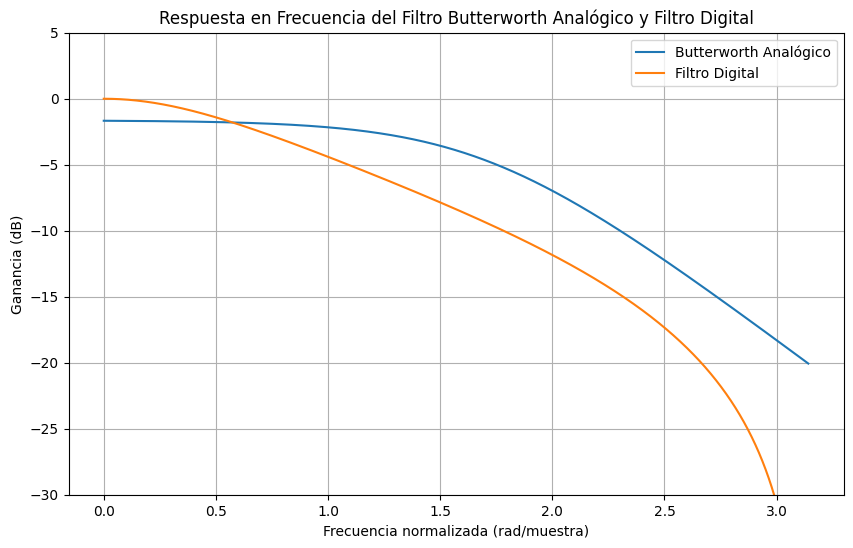

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Frecuencia de corte normalizada
omega_c = 0.25 * np.pi

# Coeficientes del filtro Butterworth analógico de primer orden
butter_b = [1]
butter_a = [1, 1 / 0.828]

# Coeficientes del filtro digital obtenido mediante la transformación bilineal
b_digital = [0.292, 0.292]
a_digital = [1, -0.4159]

# Frecuencias de evaluación
w, h_butter = signal.freqs(butter_b, butter_a, worN=8000)
w, h_digital = signal.freqz(b_digital, a_digital, worN=8000)

# Graficar ambas respuestas en frecuencia
plt.figure(figsize=(10, 6))

# Respuesta en frecuencia del filtro Butterworth analógico
plt.plot(w, 20 * np.log10(np.abs(h_butter)), label='Butterworth Analógico')

# Respuesta en frecuencia del filtro digital
plt.plot(w, 20 * np.log10(np.abs(h_digital)), label='Filtro Digital', linestyle='solid')

plt.title('Respuesta en Frecuencia del Filtro Butterworth Analógico y Filtro Digital')
plt.xlabel('Frecuencia normalizada (rad/muestra)')
plt.ylabel('Ganancia (dB)')
plt.legend()
plt.grid(True)

# Ajustar el rango del eje y para resaltar la diferencia en la ganancia
plt.ylim(-30, 5)

plt.show()
